# 1. Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# 2. Load Dataset

In [2]:
dataset = pd.read_csv("../data/raw/retail_transaction_data.csv")

# 3. Analysis

## 3.1. Checking Data Visually

In [3]:
dataset

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## 3.2. Check Data Type and Null Values

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   order_id             1067371 non-null  object 
 1   product_id           1067371 non-null  object 
 2   product_description  1062989 non-null  object 
 3   quantity             1067371 non-null  int64  
 4   order_date           1067371 non-null  object 
 5   unit_price           1067371 non-null  float64
 6   customer_id          824364 non-null   float64
 7   country              1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


### 3.2.1. Fixing "order_date" Column

In [5]:
dataset.order_date = pd.to_datetime(dataset.order_date)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   order_id             1067371 non-null  object        
 1   product_id           1067371 non-null  object        
 2   product_description  1062989 non-null  object        
 3   quantity             1067371 non-null  int64         
 4   order_date           1067371 non-null  datetime64[ns]
 5   unit_price           1067371 non-null  float64       
 6   customer_id          824364 non-null   float64       
 7   country              1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


## 3.3. Checking N-Unique of "product_id" and "product_description"

In [6]:
dataset.product_id.nunique(), dataset.product_description.nunique()

(5305, 5698)

## 3.4. Checking N-Unique of "customer_id"

In [7]:
dataset.customer_id.nunique()

5942

## 3.5. Checking N-Unique of "country"

In [8]:
dataset.country.nunique(), dataset.country.unique()

(43,
 array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
        'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
        'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
        'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
        'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
        'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
        'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
        'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
        'Czech Republic', 'European Community'], dtype=object))

## 3.6. Data Validation on Cancelled Order Criterias

In [9]:
dataset[dataset.quantity < 0].equals(
    dataset[dataset.order_id.str.contains("C")])

False

In [10]:
# kondisi dimana quantity positif tapi terdapat huruf "C" pada order_id
condition_1 = ~(dataset.quantity < 0) & (dataset.order_id.str.contains("C"))

# kondisi dimana quantity negatif tapi tidak terdapat huruf "C" pada order_id
condition_2 = (dataset.quantity < 0) & ~(dataset.order_id.str.contains("C"))

### 3.6.1. Checking "quantity" Column

In [11]:
dataset[condition_1]

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country
76799,C496350,M,Manual,1,2010-02-01 08:24:00,373.57,NaN,United Kingdom


#### 3.6.1.1. Fixing "quantity" Column

In [12]:
dataset.loc[dataset[condition_1].index, "quantity"] = dataset.loc[
    dataset[condition_1].index, "quantity"] * -1

In [13]:
dataset[condition_1]

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country
76799,C496350,M,Manual,-1,2010-02-01 08:24:00,373.57,NaN,United Kingdom


### 3.6.2. Checking "order_id" Column

In [14]:
dataset[condition_2]

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1060794,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
1060796,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
1060797,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
1062371,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


#### 3.6.2.1. Fixing "order_id" Column

In [15]:
dataset.loc[dataset[condition_2].index, "order_id"] = "C" + dataset[
    condition_2].order_id

In [16]:
dataset[condition_2]

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country
263,C489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,C489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,C489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,C489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,C489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1060794,C581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
1060796,C581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
1060797,C581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
1062371,C581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [17]:
dataset[condition_2].order_id.str.contains("C").sum()

np.int64(3457)

In [18]:
dataset[condition_1 | condition_2].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3458 entries, 263 to 1064386
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             3458 non-null   object        
 1   product_id           3458 non-null   object        
 2   product_description  769 non-null    object        
 3   quantity             3458 non-null   int64         
 4   order_date           3458 non-null   datetime64[ns]
 5   unit_price           3458 non-null   float64       
 6   customer_id          0 non-null      float64       
 7   country              3458 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 243.1+ KB


## 3.7. Checking Null Values in "customer_id"

In [19]:
dataset[dataset.customer_id.isnull()]

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country
263,C489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,C489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,C489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,C489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [20]:
dataset["null_customerid"] = dataset.customer_id.isna()

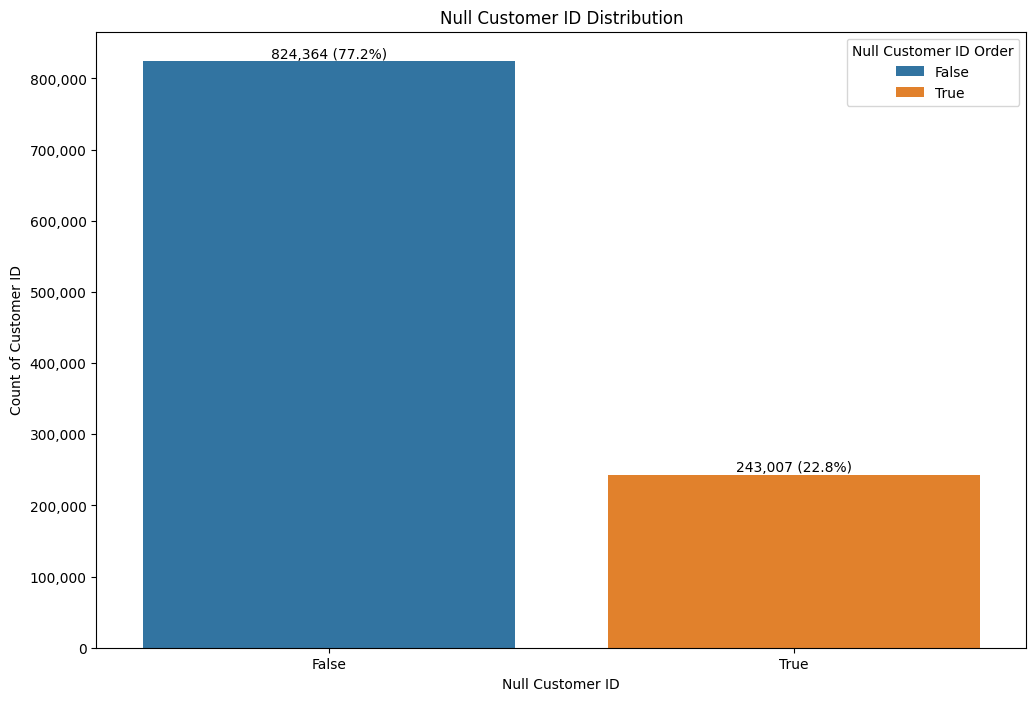

In [21]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=dataset, x="null_customerid", hue="null_customerid")
ax.set_title("Null Customer ID Distribution")
ax.set_ylabel("Count of Customer ID")
ax.set_xlabel("Null Customer ID")
ax.legend(title="Null Customer ID Order")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
for container in ax.containers: 
    ax.bar_label(
        container,
        labels=[
            f"{v:,.0f} ({v/dataset.shape[0]*100:.1f}%)"
            for v in container.datavalues
        ]
    )

In [22]:
dataset[(dataset.order_id.str.contains("C")) & (dataset.quantity < 0)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 22951 entries, 178 to 1067178
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             22951 non-null  object        
 1   product_id           22951 non-null  object        
 2   product_description  20262 non-null  object        
 3   quantity             22951 non-null  int64         
 4   order_date           22951 non-null  datetime64[ns]
 5   unit_price           22951 non-null  float64       
 6   customer_id          18744 non-null  float64       
 7   country              22951 non-null  object        
 8   null_customerid      22951 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.6+ MB


## 3.8. Check "order_id" Behavior

In [23]:
dataset

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,False


In [24]:
dataset[dataset.order_id=="489434"]

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,False
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,False
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,False
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,False


In [25]:
# buat column untuk flagging cancelled order sehingga kita tetap bisa
# mengembalikan data aslinya
dataset["cancelled_order"] = dataset.order_id.str.contains("C")

In [26]:
# hapus huruf "C" dari awal order_id
dataset.order_id = dataset.order_id.str.replace(r"^C", "", regex=True)

In [27]:
# validate hasilnya
dataset[dataset.order_id.str.contains("C")]

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid,cancelled_order


In [28]:
behavior_orderid = dataset.groupby("order_id")["cancelled_order"].nunique()\
    .reset_index().sort_values(by="cancelled_order", ascending=False)
behavior_orderid

,order_id,cancelled_order
0,489434,1
1,489435,1
2,489436,1
3,489437,1
4,489438,1
...,...,...
53623,A516228,1
53624,A528059,1
53625,A563185,1
53626,A563186,1


In [29]:
# ubah semua values dalam kolom quantity ke positif
dataset.quantity = dataset.quantity.abs()

In [30]:
# validate result
dataset[dataset.quantity < 0]

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid,cancelled_order


## 3.9. Exploration of Data Product

In [31]:
data_product = dataset.groupby("product_id")["product_description"].nunique()\
    .reset_index().sort_values(by="product_description", ascending=False)
data_product[data_product.product_description>1]

,product_id,product_description
283,20713,9
1755,22423,7
2394,23084,7
2053,22734,7
663,21181,7
...,...,...
1225,21810,2
1232,21817,2
1234,21819,2
2,10080,2


In [32]:
set(dataset[dataset.product_id=="20713"].product_description)

{'Found',
 'JUMBO BAG OWLS',
 'Marked as 23343',
 'found',
 'missing',
 nan,
 'wrongly coded 23343',
 'wrongly coded-23343',
 'wrongly marked 23343',
 'wrongly marked. 23343 in box'}

In [33]:
set(dataset[dataset.product_id=="22423"].product_description)

{'REGENCY CAKESTAND 3 TIER',
 'broken, uneven bottom',
 'damaged',
 'damages',
 'faulty',
 nan,
 'smashed',
 'wonky bottom/broken'}

In [34]:
dataset[(dataset.product_id=="22423")].sort_values(
    by="product_description", ascending=False)

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid,cancelled_order
416038,529134,22423,wonky bottom/broken,35,2010-10-26 14:48:00,0.00,NaN,United Kingdom,True,True
276229,516200,22423,smashed,31,2010-07-19 10:33:00,0.00,NaN,United Kingdom,True,True
192773,507688,22423,smashed,32,2010-05-11 09:56:00,0.00,NaN,United Kingdom,True,True
546809,538072,22423,faulty,13,2010-12-09 14:10:00,0.00,NaN,United Kingdom,True,True
524286,538072,22423,faulty,13,2010-12-09 14:10:00,0.00,NaN,United Kingdom,True,True
...,...,...,...,...,...,...,...,...,...,...
362049,524423,22423,REGENCY CAKESTAND 3 TIER,4,2010-09-29 10:34:00,12.75,13797.0,United Kingdom,False,False
362434,524489,22423,REGENCY CAKESTAND 3 TIER,6,2010-09-29 12:12:00,12.75,12540.0,Spain,False,False
362521,524502,22423,REGENCY CAKESTAND 3 TIER,16,2010-09-29 12:32:00,10.95,14156.0,EIRE,False,False
1066751,581497,22423,REGENCY CAKESTAND 3 TIER,8,2011-12-09 10:23:00,24.96,NaN,United Kingdom,True,False


In [35]:
dataset[(dataset.product_id=="20713")].sort_values(
    by="product_description", ascending=False)

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid,cancelled_order
789345,560039,20713,wrongly marked. 23343 in box,3100,2011-07-14 14:27:00,0.0,NaN,United Kingdom,True,True
941043,572547,20713,wrongly marked 23343,200,2011-10-24 17:01:00,0.0,NaN,United Kingdom,True,False
906149,569831,20713,wrongly coded-23343,800,2011-10-06 12:38:00,0.0,NaN,United Kingdom,True,True
948211,573114,20713,wrongly coded 23343,1000,2011-10-27 15:36:00,0.0,NaN,United Kingdom,True,False
261489,514584,20713,missing,170,2010-07-05 12:06:00,0.0,NaN,United Kingdom,True,True
...,...,...,...,...,...,...,...,...,...,...
318908,520498,20713,NaN,6,2010-08-26 12:26:00,0.0,NaN,United Kingdom,True,False
661733,547957,20713,NaN,32,2011-03-28 15:16:00,0.0,NaN,United Kingdom,True,False
661735,547959,20713,NaN,23,2011-03-28 15:19:00,0.0,NaN,United Kingdom,True,False
662644,548069,20713,NaN,22,2011-03-29 12:10:00,0.0,NaN,United Kingdom,True,True


In [36]:
dataset[(dataset.product_id=="23343")].sort_values(
    by="product_description", ascending=False)

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid,cancelled_order
906148,569830,23343,wrongly coded 20713,800,2011-10-06 12:38:00,0.00,NaN,United Kingdom,True,False
948212,573115,23343,wrongly coded 20713,1000,2011-10-27 15:37:00,0.00,NaN,United Kingdom,True,True
789346,560040,23343,came coded as 20713,3100,2011-07-14 14:28:00,0.00,NaN,United Kingdom,True,False
979992,575583,23343,JUMBO BAG VINTAGE CHRISTMAS,1,2011-11-10 11:55:00,2.08,14456.0,United Kingdom,False,False
977468,575305,23343,JUMBO BAG VINTAGE CHRISTMAS,30,2011-11-09 12:45:00,2.08,14188.0,United Kingdom,False,False
...,...,...,...,...,...,...,...,...,...,...
900723,569424,23343,JUMBO BAG VINTAGE CHRISTMAS,4,2011-10-04 10:49:00,2.08,15529.0,United Kingdom,False,False
900397,569412,23343,JUMBO BAG VINTAGE CHRISTMAS,10,2011-10-04 09:51:00,2.08,13650.0,United Kingdom,False,False
899194,569361,23343,JUMBO BAG VINTAGE CHRISTMAS,10,2011-10-03 14:59:00,2.08,16183.0,United Kingdom,False,False
941044,572548,23343,20713 wrongly marked,200,2011-10-24 17:01:00,0.00,NaN,United Kingdom,True,True


## 3.10. Exploration "quantity", "order_date", and "unit_price"

In [37]:
dataset.describe(percentiles=[0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99])

,quantity,order_date,unit_price,customer_id
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,1.193273e+01,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,1.000000e+00,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
80%,1.200000e+01,2011-09-06 14:38:00,4.950000e+00,17107.000000
90%,2.400000e+01,2011-11-02 15:33:00,7.950000e+00,17713.000000
95%,3.200000e+01,2011-11-22 10:21:00,9.950000e+00,17911.000000
99%,1.200000e+02,2011-12-06 13:20:00,1.800000e+01,18207.000000


### 3.10.1. Exploration "quantity"

Text(0.5, 0, 'Quantity')

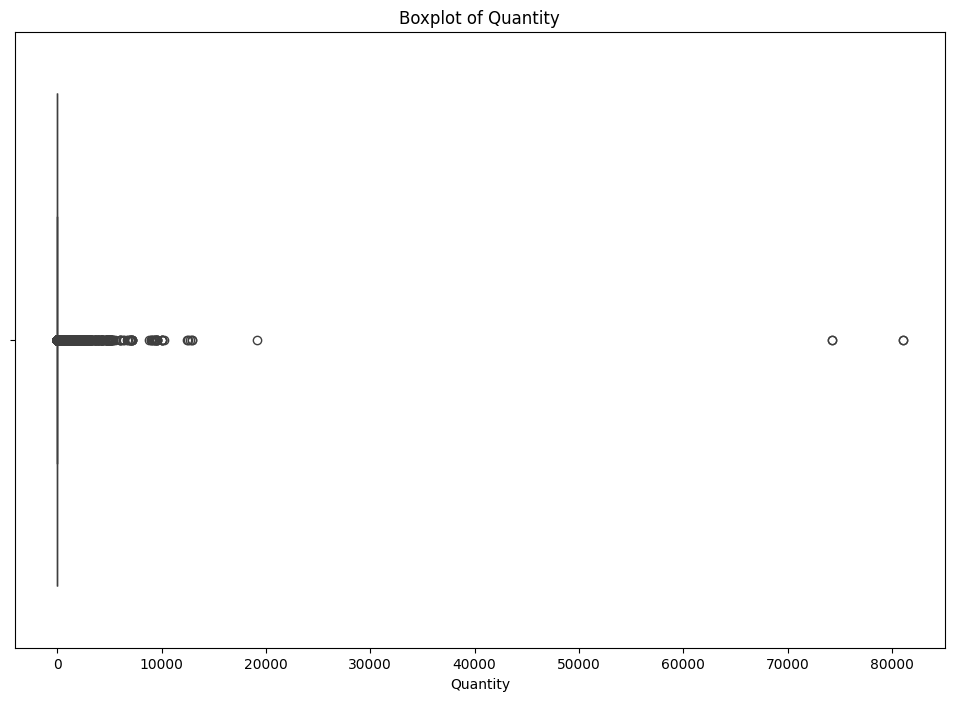

In [38]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=dataset, x="quantity")
ax.set_title("Boxplot of Quantity")
ax.set_xlabel("Quantity")

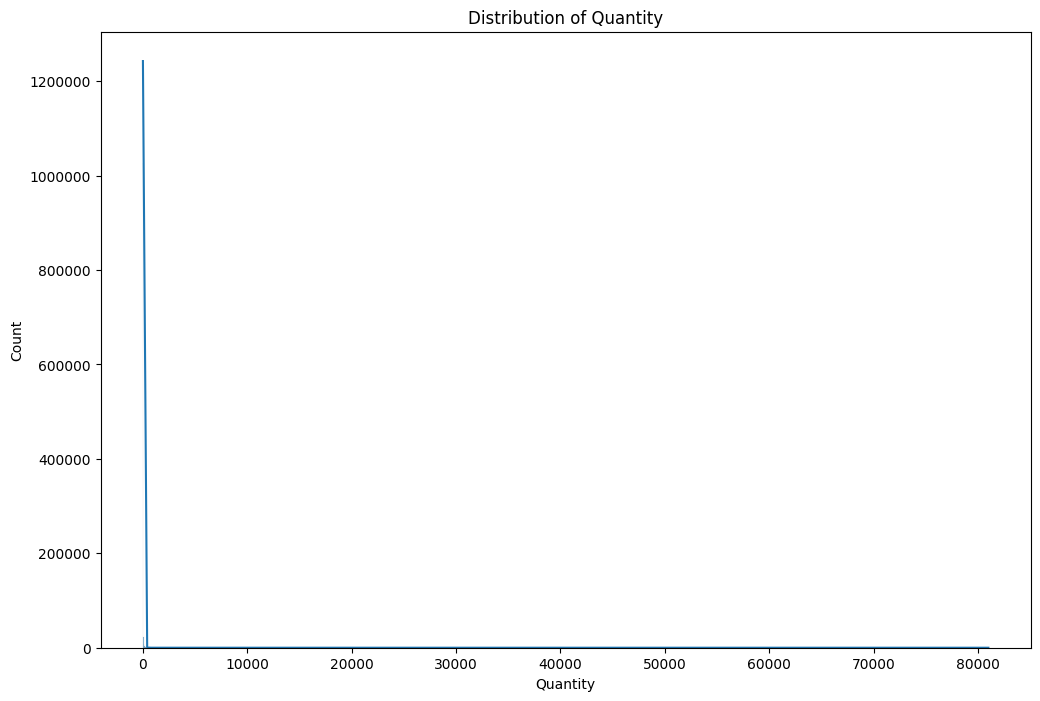

In [39]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=dataset, x="quantity", kde=True)
ax.set_title("Distribution of Quantity")
ax.set_xlabel("Quantity")
ax.ticklabel_format(style="plain", axis="y")

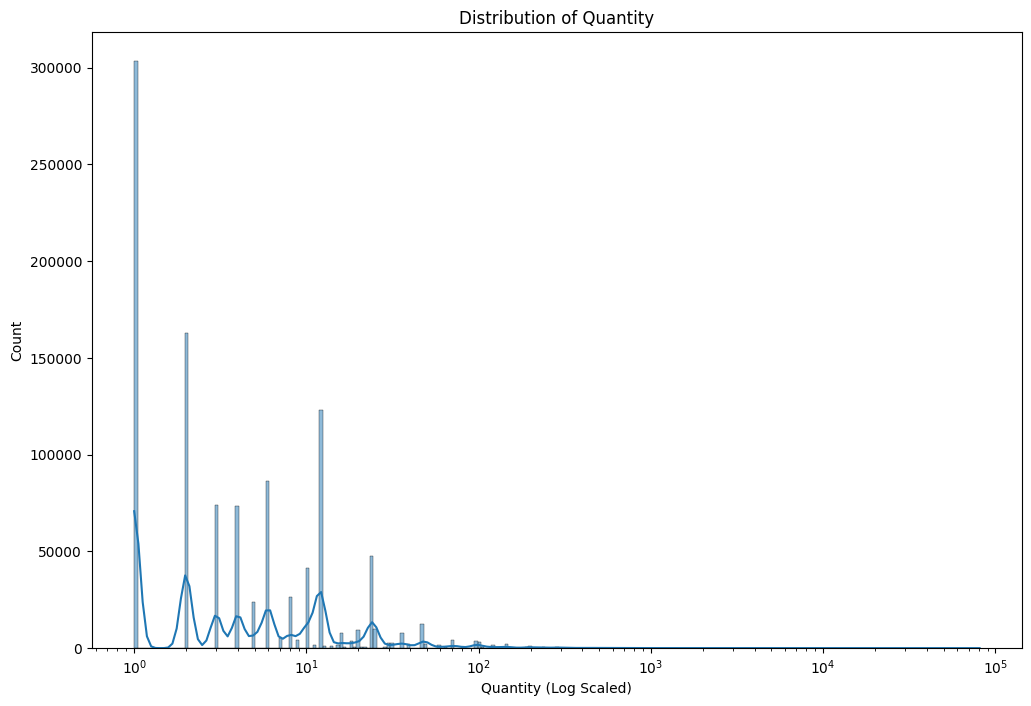

In [40]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=dataset, x="quantity", kde=True, log_scale=True)
ax.set_title("Distribution of Quantity")
ax.set_xlabel("Quantity (Log Scaled)")
ax.ticklabel_format(style="plain", axis="y")

In [41]:
dataset.sort_values(by="quantity")

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid,cancelled_order
972972,574950,90087,CRYSTAL SEA HORSE PHONE CHARM,1,2011-11-08 09:29:00,1.63,NaN,United Kingdom,True,False
972973,574950,90114,SUMMER DAISIES BAG CHARM,1,2011-11-08 09:29:00,2.46,NaN,United Kingdom,True,False
972974,574950,90116,FRUIT SALAD BAG CHARM,1,2011-11-08 09:29:00,2.46,NaN,United Kingdom,True,False
972975,574950,90118,PINK DAISY BAG CHARM,1,2011-11-08 09:29:00,2.46,NaN,United Kingdom,True,False
972976,574950,90119,METALIC LEAVES BAG CHARMS,1,2011-11-08 09:29:00,2.46,NaN,United Kingdom,True,False
...,...,...,...,...,...,...,...,...,...,...
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902.0,Denmark,False,False
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,False,False
587085,541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,False,True
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,False,False


In [42]:
q1 = dataset.quantity.quantile(0.25)
q3 = dataset.quantity.quantile(0.75)
iqr = q3 - q1

# konstanta 1.5 dipilih oleh John W. Tukey untuk menjadi batas suatu data 
# dinilai "cukup jauh" dari pusat distribusi.
# nilai kontanta terlalu kecil dapat membuat banyak false positif dan terlalu 
# besar dapat membuat banyak false negatif
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
lower_bound, upper_bound

(np.float64(-12.5), np.float64(23.5))

In [43]:
# namun kita coba "melebarkan" cakupan pendeteksian outlier (meski mungkin
# akan menimbulkan false negatif)
lower_bound = q1 - (2 * iqr)
upper_bound = q3 + (2 * iqr)
lower_bound, upper_bound

(np.float64(-17.0), np.float64(28.0))

Text(0.5, 0, 'Quantity')

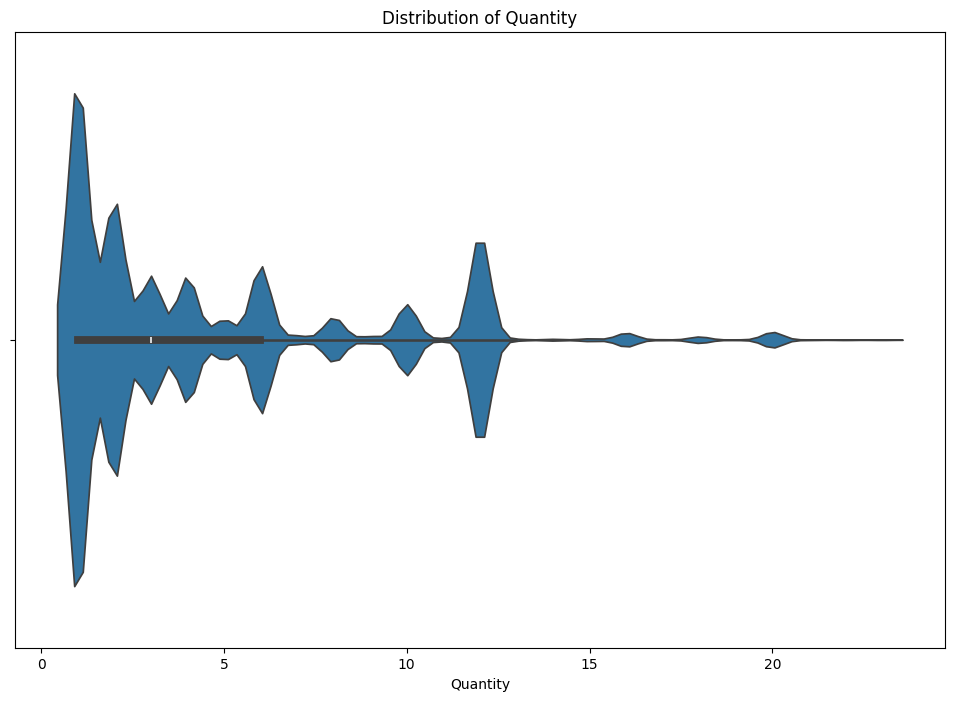

In [44]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(data=dataset[dataset.quantity<=23.5], x="quantity")
ax.set_title("Distribution of Quantity")
ax.set_xlabel("Quantity")

### 3.10.2. Exploration "unit_price"

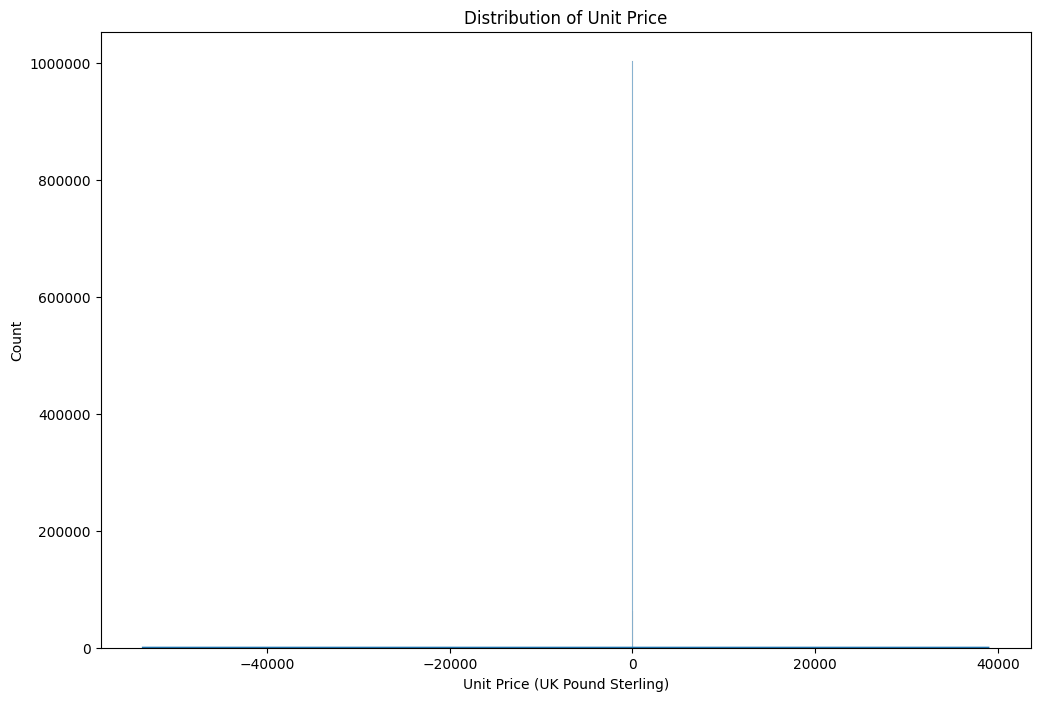

In [45]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=dataset, x="unit_price", kde=True)
ax.set_title("Distribution of Unit Price")
ax.set_xlabel("Unit Price (UK Pound Sterling)")
ax.ticklabel_format(style="plain", axis="y")

In [46]:
dataset[dataset.unit_price<0]

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid,cancelled_order
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom,True,False
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom,True,False
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom,True,False
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,True,False
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,True,False


In [47]:
dataset[dataset.unit_price==0]

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid,cancelled_order
263,489464,21733,85123a mixed,96,2009-12-01 10:52:00,0.0,NaN,United Kingdom,True,True
283,489463,71477,short,240,2009-12-01 10:52:00,0.0,NaN,United Kingdom,True,True
284,489467,85123A,21733 mixed,192,2009-12-01 10:53:00,0.0,NaN,United Kingdom,True,True
470,489521,21646,NaN,50,2009-12-01 11:44:00,0.0,NaN,United Kingdom,True,True
3114,489655,20683,NaN,44,2009-12-01 17:26:00,0.0,NaN,United Kingdom,True,True
...,...,...,...,...,...,...,...,...,...,...
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,True,False
1063965,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom,True,False
1063966,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom,True,False
1064015,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom,True,False


In [48]:
dataset = dataset[dataset.unit_price>0]

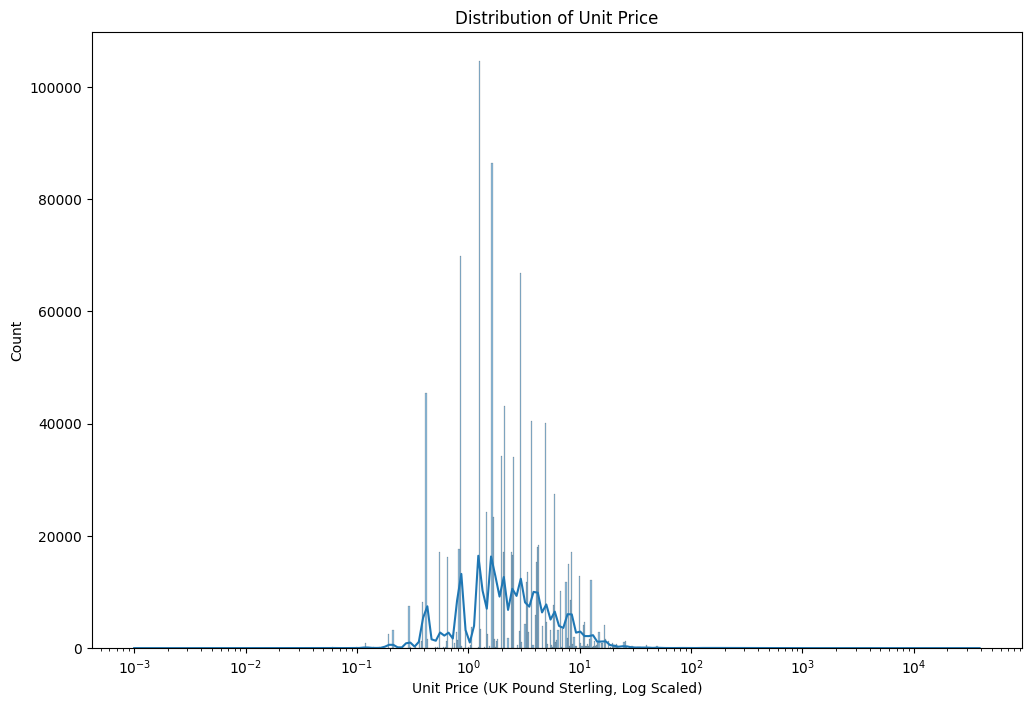

In [49]:
plt.figure(figsize=(12, 8))

# gunakan log_scale karena kita tahu sebelumnya ada unit_price yang nilainya
# fantastis
ax = sns.histplot(data=dataset, x="unit_price", kde=True,
                  log_scale=True)
ax.set_title("Distribution of Unit Price")
ax.set_xlabel("Unit Price (UK Pound Sterling, Log Scaled)")
ax.ticklabel_format(style="plain", axis="y")

In [50]:
dataset.sort_values(by="unit_price")

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid,cancelled_order
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0,United Kingdom,False,False
682656,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,False,False
178629,506303,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-29 10:43:00,0.001,14249.0,United Kingdom,False,False
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom,False,False
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom,False,False
...,...,...,...,...,...,...,...,...,...,...
1050063,580605,AMAZONFEE,AMAZON FEE,1,2011-12-05 11:36:00,17836.460,NaN,United Kingdom,True,True
320581,520667,BANK CHARGES,Bank Charges,1,2010-08-27 13:42:00,18910.690,NaN,United Kingdom,True,True
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.090,NaN,United Kingdom,True,False
241824,512770,M,Manual,1,2010-06-17 16:52:00,25111.090,17399.0,United Kingdom,False,True


### 3.10.3. Revisit Product Description

In [51]:
dataset["pdesc_char_count"] = dataset.product_description.str.len()

/tmp/ipykernel_763609/2213259437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["pdesc_char_count"] = dataset.product_description.str.len()


Text(0.5, 0, 'Char Count')

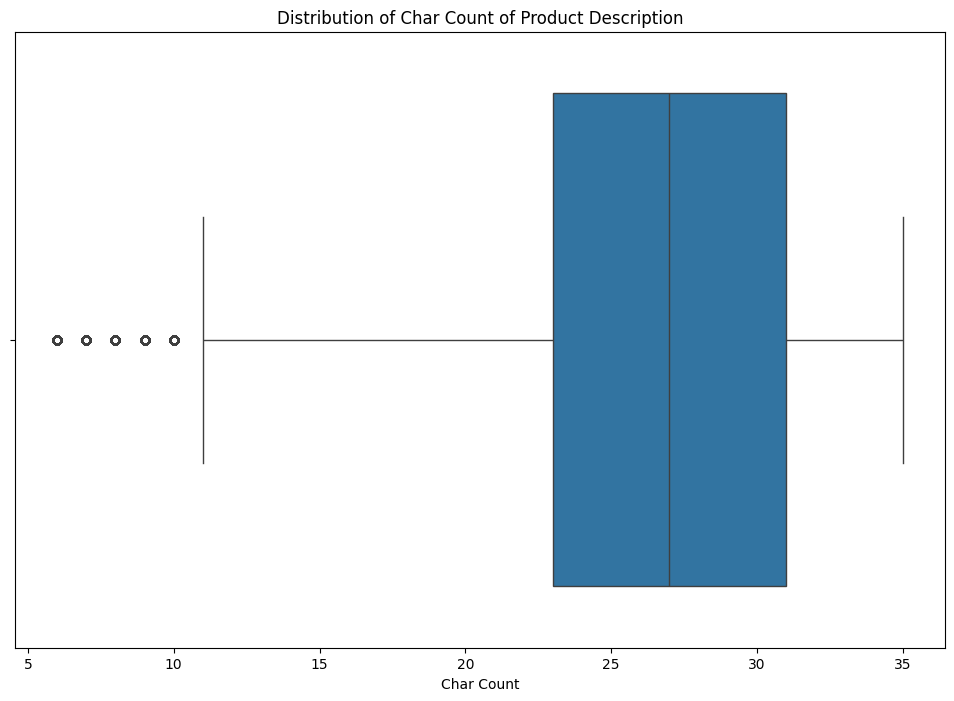

In [52]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(dataset, x="pdesc_char_count", orient="h")
ax.set_title("Distribution of Char Count of Product Description")
ax.set_xlabel("Char Count")

In [53]:
# dengan prior knowledge seperti "bank charges", "manual", dan "amazon fee"
# ditambah dengan lower bound dari boxplot, maka kita cek untuk yang char count-
# nya < 13
dataset[dataset.pdesc_char_count<13].product_description.unique()

array(['CAT BOWL ', 'POSTAGE', 'BINGO SET', 'SKULLS WRAP', 'Discount',
       'PHOTO CUBE', 'FROG CANDLE', 'LIBRARY LAMP', 'SPACE FROG',
       'OWL DOORSTOP', 'DAISY RING', 'Manual', 'CONCH SHELL',
       'DOGGY RUBBER', 'SPACE OWL', 'SKULLS TAPE', 'SOMBRERO ',
       'MOON INCENSE', 'CARRIAGE', 'GOLD WASHBAG', 'RAIN PONCHO ',
       'EMPIRE TEDDY', 'SPOTS MUG', 'SAMPLES', 'Bank Charges',
       'BUTTON BOX ', 'WICKER STAR ', 'POLKADOT PEN', 'AMAZON FEE',
       'CORDIAL JUG', 'CHAMBRE HOOK'], dtype=object)

In [54]:
# buat list of black listed keywords
blist_keywords = ["postage", "discount", "manual", "carriage", "bank charges", 
                  "amazon fee"]

In [55]:
# test terlabih dahulu apakah sesuai dengan tujuan kita
dataset[dataset.product_description.str.contains("|".join(blist_keywords),
    case=False)].product_description.unique()                                                 

array(['POSTAGE', 'Discount', 'DOTCOM POSTAGE', 'Manual',
       'GOTHIC CARRIAGE LANTERN', 'BLACK BAROQUE CARRIAGE CLOCK',
       'WHITE BAROQUE CARRIAGE CLOCK', 'CARRIAGE', ' Bank Charges',
       'Bank Charges', 'AMAZON FEE', 'FRENCH CARRIAGE LANTERN',
       'Next Day Carriage'], dtype=object)

In [56]:
# update keyword carriage
blist_keywords = ["postage", "discount", "manual", "carriage$", "bank charges", 
                  "amazon fee"]

In [57]:
dataset[dataset.product_description.str.contains("|".join(blist_keywords),
    case=False)].product_description.unique()      

array(['POSTAGE', 'Discount', 'DOTCOM POSTAGE', 'Manual', 'CARRIAGE',
       ' Bank Charges', 'Bank Charges', 'AMAZON FEE', 'Next Day Carriage'],
      dtype=object)

In [58]:
dataset[dataset.product_description.str.contains("|".join(blist_keywords),
    case=False)]

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid,cancelled_order,pdesc_char_count
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France,False,False,7
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA,False,False,7
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium,False,False,7
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany,False,False,7
735,489535,D,Discount,1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom,False,True,8
...,...,...,...,...,...,...,...,...,...,...,...
1067002,581499,M,Manual,1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,False,True,6
1067191,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany,False,False,7
1067228,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany,False,False,7
1067229,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany,False,False,7


In [59]:
dataset[dataset.product_description.str.contains("|".join(blist_keywords),
    case=False)].describe()

,quantity,order_date,unit_price,customer_id,pdesc_char_count
count,5654.000000,5654,5654.000000,3694.000000,5654.000000
mean,4.685002,2010-12-31 10:36:58.588609792,271.801236,13908.614239,8.866820
min,1.000000,2009-12-01 09:28:00,0.001000,12346.000000,6.000000
25%,1.000000,2010-07-06 19:13:30,15.000000,12589.000000,6.000000
50%,1.000000,2010-12-09 11:12:30,28.000000,12785.000000,7.000000
75%,2.000000,2011-07-07 17:09:00,144.937500,14911.000000,14.000000
max,1600.000000,2011-12-09 12:50:00,38970.000000,18287.000000,17.000000
std,40.976291,NaN,1271.129060,1723.609990,3.356434


In [60]:
# lakukan drop data
dataset = dataset[~dataset.product_description.str.contains("|".join(
    blist_keywords), case=False)]

In [61]:
# take a look datanya
dataset.sort_values("unit_price")

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid,cancelled_order,pdesc_char_count
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom,False,False,26
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom,False,False,26
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0,Germany,False,False,26
468280,533528,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-11-17 15:08:00,0.001,15750.0,United Kingdom,False,False,26
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom,False,False,26
...,...,...,...,...,...,...,...,...,...,...,...
992356,576338,CRUK,CRUK Commission,1,2011-11-14 15:27:00,1038.750,14096.0,United Kingdom,False,True,15
1053454,580726,CRUK,CRUK Commission,1,2011-12-05 17:17:00,1100.440,14096.0,United Kingdom,False,True,15
192196,507637,84016,FLAG OF ST GEORGE CAR FLAG,1,2010-05-10 14:55:00,1157.150,NaN,United Kingdom,True,False,26
71077,495798,ADJUST,Adjustment by john on 26/01/2010 17,1,2010-01-26 17:25:00,5117.030,NaN,United Kingdom,True,False,35


In [62]:
dataset.sort_values("unit_price").tail(60)

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid,cancelled_order,pdesc_char_count
362285,524482,22656,VINTAGE BLUE KITCHEN CABINET,1,2010-09-29 11:40:00,295.00,15734.0,United Kingdom,False,False,28
287812,517393,22655,VINTAGE RED KITCHEN CABINET,2,2010-07-29 10:00:00,295.00,13340.0,United Kingdom,False,False,27
334376,522044,22656,VINTAGE BLUE KITCHEN CABINET,1,2010-09-10 13:29:00,295.00,15809.0,United Kingdom,False,True,28
530450,536835,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-02 18:06:00,295.00,13145.0,United Kingdom,False,False,27
268525,515349,22656,VINTAGE BLUE KITCHEN CABINET,1,2010-07-12 10:43:00,295.00,15513.0,United Kingdom,False,False,28
268526,515349,22655,VINTAGE RED KITCHEN CABINET,1,2010-07-12 10:43:00,295.00,15513.0,United Kingdom,False,False,27
313339,519887,22655,VINTAGE RED KITCHEN CABINET,1,2010-08-22 12:03:00,295.00,18260.0,United Kingdom,False,False,27
290300,517650,22655,VINTAGE RED KITCHEN CABINET,1,2010-07-30 14:00:00,295.00,13015.0,United Kingdom,False,False,27
368234,525022,22655,VINTAGE RED KITCHEN CABINET,1,2010-10-03 12:00:00,295.00,17412.0,United Kingdom,False,False,27
316572,520204,22656,VINTAGE BLUE KITCHEN CABINET,1,2010-08-24 16:08:00,295.00,16985.0,United Kingdom,False,False,28


In [63]:
dataset.sort_values("unit_price").head(60)

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid,cancelled_order,pdesc_char_count
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom,False,False,26
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom,False,False,26
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0,Germany,False,False,26
468280,533528,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-11-17 15:08:00,0.001,15750.0,United Kingdom,False,False,26
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom,False,False,26
440930,531433,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-11-08 11:54:00,0.001,13317.0,United Kingdom,False,False,26
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom,False,False,26
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom,False,False,26
178629,506303,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-29 10:43:00,0.001,14249.0,United Kingdom,False,False,26
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom,False,False,26


In [64]:
# update keyowrds
blist_keywords = ["postage", "discount", "manual", "carriage$", "bank charges", 
                  "amazon fee", "adjust", "cruk", "sample"]

In [65]:
# cek lagi datanya, jika telah sesuai tujuan maka lakukan drop data
dataset[dataset.product_description.str.contains("|".join(blist_keywords),
    case=False)].product_description.unique()  

array(['Adjustment by john on 26/01/2010 16',
       'Adjustment by john on 26/01/2010 17', 'SAMPLES',
       'Adjustment by Peter on 24/05/2010 1',
       'Adjustment by Peter on Jun 25 2010 ', 'Adjust bad debt',
       'CRUK Commission'], dtype=object)

In [66]:
# dropping data
dataset = dataset[~dataset.product_description.str.contains("|".join(
    blist_keywords), case=False)]

In [67]:
# validate data
dataset.sort_values("unit_price").tail(60)

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,null_customerid,cancelled_order,pdesc_char_count
740135,555599,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2011-06-06 10:59:00,195.00,17190.0,United Kingdom,False,True,29
691572,550890,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2011-04-21 12:00:00,195.00,14711.0,United Kingdom,False,False,29
638236,545900,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2011-03-07 17:42:00,195.00,17817.0,United Kingdom,False,False,29
577135,540652,22655,VINTAGE RED KITCHEN CABINET,1,2011-01-10 15:04:00,265.50,17406.0,United Kingdom,False,True,27
248762,513439,84016,FLAG OF ST GEORGE CAR FLAG,1,2010-06-24 14:17:00,272.27,NaN,United Kingdom,True,False,26
114155,500315,84016,FLAG OF ST GEORGE CAR FLAG,1,2010-03-07 11:56:00,280.75,NaN,United Kingdom,True,False,26
659468,547814,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-03-25 14:19:00,295.00,13452.0,United Kingdom,False,False,28
557945,539080,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-16 08:41:00,295.00,16607.0,United Kingdom,False,False,27
696639,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-04-28 12:22:00,295.00,14973.0,United Kingdom,False,False,28
368233,525022,22656,VINTAGE BLUE KITCHEN CABINET,1,2010-10-03 12:00:00,295.00,17412.0,United Kingdom,False,False,28


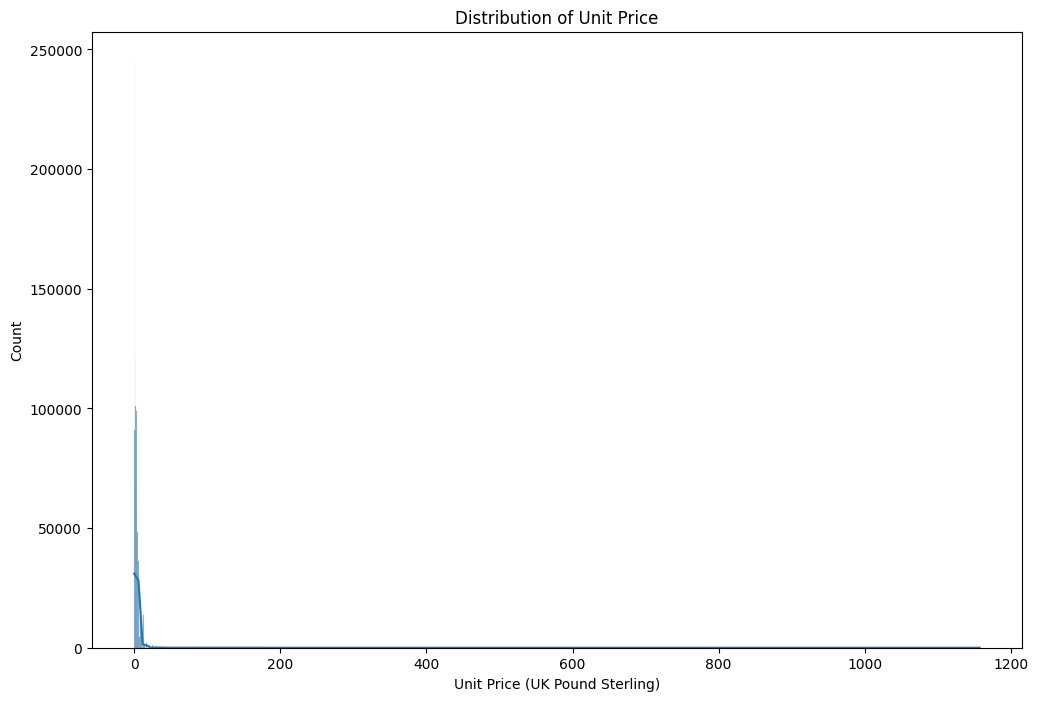

In [68]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=dataset, x="unit_price", kde=True)
ax.set_title("Distribution of Unit Price")
ax.set_xlabel("Unit Price (UK Pound Sterling)")
ax.ticklabel_format(style="plain", axis="y")

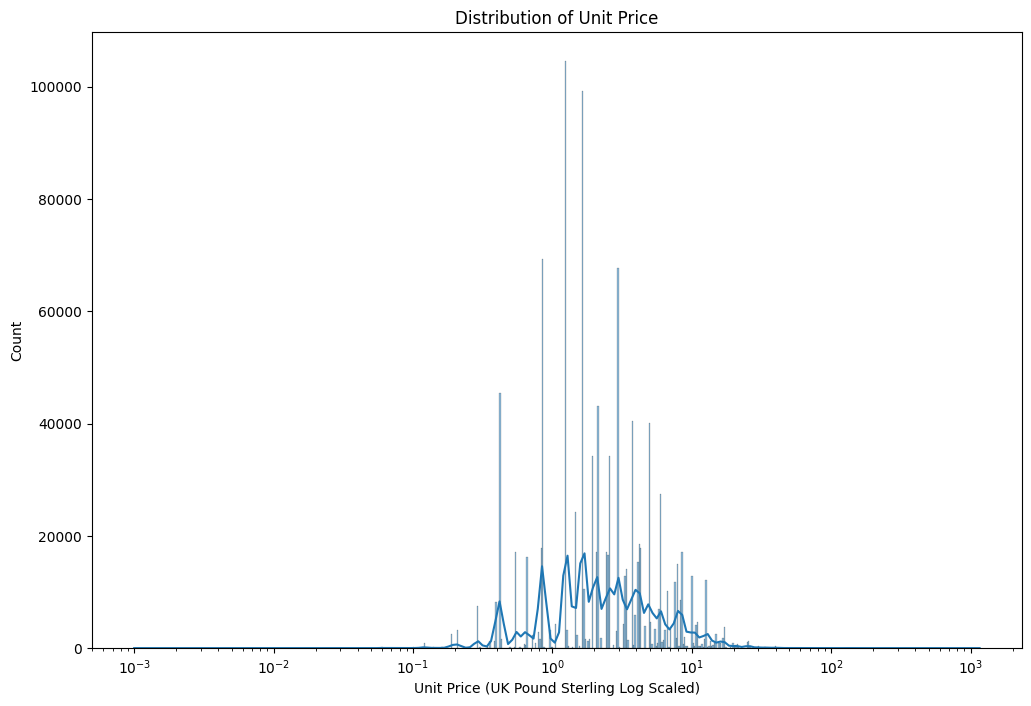

In [69]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=dataset, x="unit_price", kde=True, log_scale=True)
ax.set_title("Distribution of Unit Price")
ax.set_xlabel("Unit Price (UK Pound Sterling Log Scaled)")
ax.ticklabel_format(style="plain", axis="y")

In [70]:
# buang data duplikat
dataset = dataset.drop_duplicates()

# pecah menjadi demand forecase dan customer analysis
demand_forecast = dataset.drop(columns=["null_customerid", "cancelled_order",
                                        "pdesc_char_count"])
customer_analysis = dataset[~dataset.customer_id.isnull()].drop(columns=[
    "null_customerid", "cancelled_order", "pdesc_char_count"])

In [71]:
demand_forecast.to_csv("../data/interim/demand_forecast.csv", index=False)
customer_analysis.to_csv("../data/interim/customer_analysis.csv", index=False)